# Hello Logistic Regression

In [1]:
# Prerequisites
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
print("Python Version: ", sys.version)
print("Numpy Version: ", np.__version__)
print("Pandas Version: ", pd.__version__)
np.set_printoptions(precision=3, suppress=True)

Python Version:  3.12.7 (tags/v3.12.7:0b05ead, Oct  1 2024, 03:06:41) [MSC v.1941 64 bit (AMD64)]
Numpy Version:  2.2.2
Pandas Version:  2.2.3


## Load Iris Dataset and Explore

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris(as_frame=True)
print(list(iris_dataset))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [13]:
print(iris_dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [4]:
iris_dataset.data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

### Make a Binary classifier for Iris Virginica type based on petal width feature alone

Split into Test and Training Sets

In [14]:
X = iris_dataset.data[["petal width (cm)"]].values
y = iris_dataset.target_names[iris_dataset.target] == 'virginica'

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Fit Logistic Regression Model

In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

Check out model’s estimated probabilities for petal widths betweem 0 cm and 3 cm

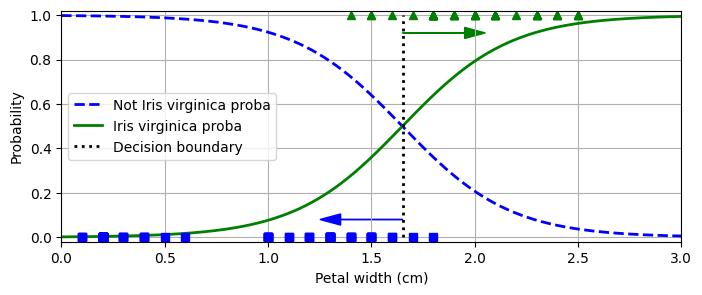

In [17]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3)) 
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()

plt.show()

In [18]:
print("Decision Boundary: ", decision_boundary)

Decision Boundary:  1.6516516516516517


Check out some predictions

In [19]:
log_reg.predict([[1.0],[1.5],[1.7],[2.0]])

array([False, False,  True,  True])

### Build a Multi-class classifier for Iris flowers using Softmax and based on 2 features

In [32]:
X = iris_dataset.data[["petal length (cm)", "petal width (cm)"]].values
y = iris_dataset["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg_smax = LogisticRegression(C=25, random_state=42)
log_reg_smax.fit(X_train, y_train)

LogisticRegression(C=25, random_state=42)

In [33]:
print(iris_dataset.target_names)

['setosa' 'versicolor' 'virginica']


In [34]:
res = log_reg_smax.predict_proba([[5, 2]]).round(2)
print("Probabilities: ", res)
idx = np.argmax(res)
print("Iris type: ", iris_dataset.target_names[idx])

Probabilities:  [[0.   0.04 0.96]]
Iris type:  virginica


In [35]:
res = log_reg_smax.predict_proba([[1, 3]]).round(2)
print("Probabilities: ", res)
idx = np.argmax(res)
print("Iris type: ", iris_dataset.target_names[idx])

Probabilities:  [[1. 0. 0.]]
Iris type:  setosa


In [36]:
res = log_reg_smax.predict_proba([[4, 1]]).round(2)
print("Probabilities: ", res)
idx = np.argmax(res)
print("Iris type: ", iris_dataset.target_names[idx])

Probabilities:  [[0. 1. 0.]]
Iris type:  versicolor
